# hierarchical clustering

## data prep

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('Mall_Customers.csv')
x = dataset.iloc[:,[3,4]].values

In [6]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## using dendogram as observation

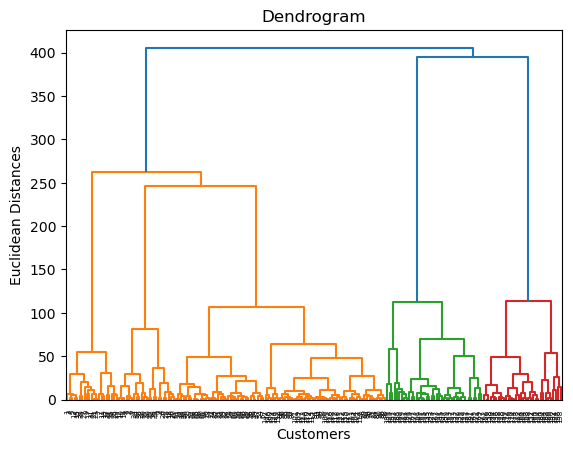

In [13]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

we observe that we can use 5 as number of optimum clusters

## training the HC model

In [24]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

## visualising the cluster

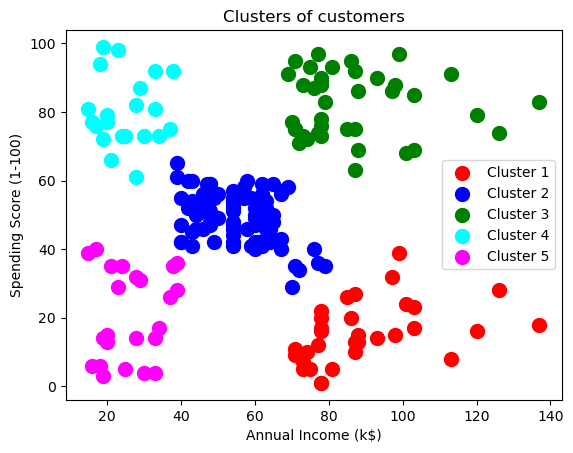

In [27]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

----

## personal notes

### what is the intuition of hierarchical clustering ?
Hierarchical clustering is a method of cluster analysis that seeks to build a hierarchy of clusters. It is particularly useful when you want to understand the structure of data at different levels of granularity. Here's the intuition behind hierarchical clustering::

1. **Clustering as a Tree Structure (Dendrogram):**
   - Hierarchical clustering can be visualized as a tree-like structure called a dendrogram. At the bottom of the tree, each data point starts as its own individual cluster. As you move up the tree, clusters are merged step by step based on their similarity, forming larger and larger clusters. The top of the tree represents a single cluster that contains all the data points.
   - The height of each merge (the y-axis in a dendrogram) represents the distance or dissimilarity between the clusters being merged. The greater the height, the more dissimilar the clusters were before they were merged.

2. **Agglomerative vs. Divisive Approaches:**
   - **Agglomerative Clustering (Bottom-Up Approach):**
     - Start with each data point as its own cluster.
     - Iteratively merge the closest pairs of clusters until all points are merged into a single cluster.
   - **Divisive Clustering (Top-Down Approach):**
     - Start with all data points in a single cluster.
     - Iteratively split the most dissimilar clusters until each data point is in its own cluster.
   - Agglomerative clustering is more commonly used than divisive clustering.

3. **Distance/Similarity Metrics:**
   - The decision of which clusters to merge is based on a distance or similarity metric. Common metrics include:
     - **Euclidean Distance:** Straight-line distance between two points in Euclidean space.
     - **Manhattan Distance:** Sum of absolute differences along each dimension.
     - **Cosine Similarity:** Measure of the cosine of the angle between two vectors.
   - The method used to calculate the distance between clusters can also vary, leading to different types of linkage criteria, such as:
     - **Single Linkage:** Distance between the closest points of two clusters.
     - **Complete Linkage:** Distance between the farthest points of two clusters.
     - **Average Linkage:** Average distance between all points of two clusters.
     - **Ward's Method:** Minimize the variance within each cluster.

4. **Interpreting the Dendrogram:**
   - By "cutting" the dendrogram at a particular height, you can determine the number of clusters in your data. The height at which you cut the dendrogram defines the granularity of your clustering:
     - Cutting lower in the dendrogram results in more clusters (finer granularity).
     - Cutting higher results in fewer clusters (coarser granularity).
   - The lengths of the branches give insights into the relative differences or similarities among clusters.

5. **Flexibility and Insight:**
   - Hierarchical clustering is flexible as it doesn't require you to specify the number of clusters upfront, unlike methods like k-means.
   - It provides insights into the natural groupings and hierarchical structure of data, which is especially useful when explohips and similarities among the animals.

### dendogram and how it works ?
a dendogram is a visual representation of a hierarchical clustering process . a dendogram resembles a tree diagram that depicts how each data point or object in a dataset is collected in stages until all data points are combined into one large cluster. 